In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

import matplotlib.pyplot as plt
import numpy as np

## Clustering
Unlikely supervised machine learning, in clustering we are determining similar data points

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [63]:
X, _ = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=2, random_state=0)

k_means_ = KMeans(n_clusters=6)
k_means_.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means_.inertia_

In [64]:
centers_ = k_means_.cluster_centers_

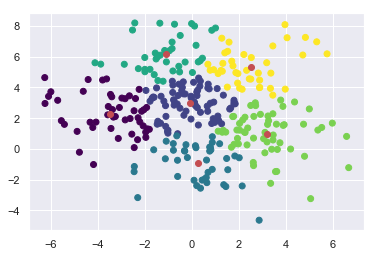

In [65]:
clusters = k_means_.predict(X)
plt.scatter(*X.T, c=clusters, cmap='viridis')
plt.scatter(*centers_.T, c='r')

In [ ]:
from sklearn.metrics import silhouette_score

## metrics for clustering
1. Inertia
2. Silhouette coefficient

## Kmeans Clustering


In [42]:
from ipywidgets import interact

def plot_kmeans_steps(X, n_clusters, seeds=np.array([[0, 4], [4, 2], [-2, 4]])):
    def func(step=0):
        iters = step // 2
        
        if iters:
            kmeans = KMeans(n_clusters=n_clusters, max_iter=iters, n_init=1, init=seeds)
            kmeans.fit(X)
            centroids = kmeans.cluster_centers_
            labels = kmeans.labels_
            print (kmeans.cluster_centers_)
        else:
            centroids = seeds
            labels = '0.5'
            
        if step % 2:
            kmeans = KMeans(n_clusters=n_clusters, max_iter=iters+1, n_init=1, init=seeds)
            kmeans.fit(X)
            labels = kmeans.labels_
            print (kmeans.cluster_centers_)
        
        plt.scatter(*X.T, c=labels, cmap='viridis', alpha=0.5)
        plt.scatter(*centroids.T, c=range(n_clusters), cmap='viridis', marker='*', s=150, 
                    linewidths=1, edgecolors='k')
        plt.title(['Set Centroids', 'Assign Clusters'][step % 2])
    
    return func

interact(plot_kmeans_steps(X, n_clusters=3), step=(0, 10));

interactive(children=(IntSlider(value=0, description='step', max=10), Output()), _dom_classes=('widget-interac…

## elbow plot 
for deteriming the optimal numbers of clusters that will reduce inertia


In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# import and shuffle the data
data = fetch_california_housing()
X = data['data']
X_shuffled = shuffle(X, random_state=0)

scaler = StandardScaler() # need to scale data to make kmeans work properly
Xt = scaler.fit_transform(X_shuffled[:500]) # down sample for speed
n_clusters = range(1, 200, 2)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(Xt)
    inertia.append(kmeans.inertia_)



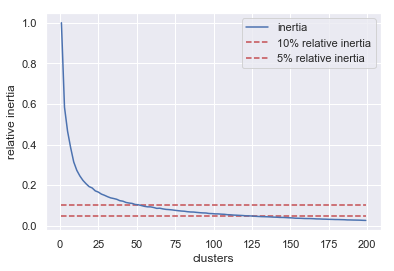

In [51]:
plt.plot(n_clusters, inertia/inertia[0])
plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
plt.xlabel('clusters')
plt.ylabel('relative inertia')
plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

one cannot look at this plot and definitely say whether using 50 clusters is better than using 100 clusters. Instead, we justify our choice of cluster size given the analysis and understand there is some arbitrariness in the decision

## elongated clusters

In [55]:
def elongated(clustering=None):
    X, _ = make_blobs(n_samples=300, n_features=2, cluster_std=0.5, random_state=0)

    # elongate the data
    Xt = np.dot(X, [[0.6, -0.64], [-0.4, 0.9]])

    if clustering is None:
        plt.scatter(*Xt.T, cmap='viridis')
    else:
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(Xt)
        clusters = kmeans.predict(Xt)
        plt.scatter(*Xt.T, c=clusters, cmap='viridis');
        
interact(elongated, clustering=[None, 'kmeans']);

interactive(children=(Dropdown(description='clustering', options=(None, 'kmeans'), value=None), Output()), _do…

## gaussian mixture models

In [66]:
from ipywidgets import FloatSlider
import scipy as sp

def multivariate_gaussian(corr=0, sigma_x=1, sigma_y=1):
    cov = sigma_x*sigma_y*np.array([[sigma_x/sigma_y, corr], [corr, sigma_x/sigma_y]])
    dist = sp.stats.multivariate_normal(mean=[0, 0], cov=cov)
    X = dist.rvs(1000, random_state=0)
    
    n = 100
    xlims = [-4, 4]
    ylims = [-4, 4]
    X1, X2 = np.meshgrid(np.linspace(*xlims, n), np.linspace(*ylims, n))
    proba = dist.pdf(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))
    
    plt.scatter(*X.T, alpha=0.25)
    plt.contour(X1, X2, proba.reshape(100, 100))
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.xlabel('$x$')
    plt.ylabel('$y$')

corr_slider = FloatSlider(min=-0.99, max=0.99, value=0., step=0.01, description='$\\rho$')
sigma_x_slider = FloatSlider(min=0.5, max=1.5, value=1., step=0.01, description='$\sigma_x$')
sigma_y_slider = FloatSlider(min=0.5, max=1.5, value=1., step=0.01, description='$\sigma_y$')
interact(multivariate_gaussian, corr=corr_slider, sigma_x=sigma_x_slider, sigma_y=sigma_y_slider);

interactive(children=(FloatSlider(value=0.0, description='$\\rho$', max=0.99, min=-0.99, step=0.01), FloatSlid…

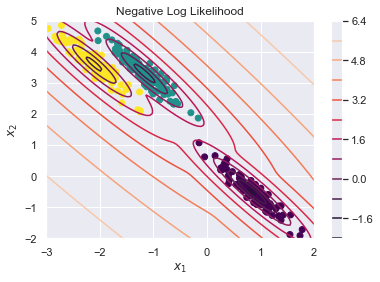

In [117]:
from sklearn.mixture import GaussianMixture

X, _ = make_blobs(n_samples=300, n_features=2, cluster_std=0.5, random_state=0)
Xt = np.dot(X, [[0.6, -0.64], [-0.4, 0.9]])

gm = GaussianMixture(n_components=3, covariance_type='full')
gm.fit(Xt)
clusters = gm.predict(Xt)

xlims = [-3, 2]
ylims = [-2, 5]
X1, X2 = np.meshgrid(np.linspace(*xlims, 100), np.linspace(*ylims, 100))
proba = gm.score_samples(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))

plt.contour(X1, X2, np.log(-proba.reshape(100, 100)),10)
plt.colorbar()
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(*Xt.T, c=clusters, cmap='viridis')
plt.title('Negative Log Likelihood');

1. The silhouette coefficient can also be used for choosing the number of clusters. `scikit-learn` has a function to calculate the silhouette coefficient: `from sklearn.metrics import silhouette_score`. Compare the silhouette coefficient as a function of number of clusters with the elbow plot displayed in the notebook.

1. For the California housing data, create an elbow plot using Gaussian mixture models. What would be good choice of the number of clusters. How does the training time compare with $K$-means?

In [124]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'silhouette score')

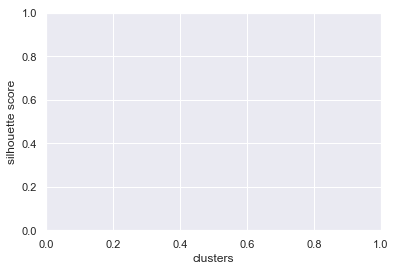

In [130]:
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# import and shuffle the data
data = fetch_california_housing()
X = data['data']
X_shuffled = shuffle(X, random_state=0)

scaler = StandardScaler() # need to scale data to make kmeans work properly
Xt = scaler.fit_transform(X_shuffled[:500]) # down sample for speed
n_clusters = range(2, 200, 2)
silhouette_score_ = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(Xt)
    labels = kmeans.predict(Xt)
    silhouette_score_.append(silhouette_score(Xt, labels))

# plt.plot(n_clusters, inertia/inertia[0])
# plt.hlines(0.1, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')
# plt.hlines(0.05, n_clusters[0], n_clusters[-1], 'r', linestyles='dashed')

# plt.legend(['inertia', '10% relative inertia', '5% relative inertia']);

In [128]:
silhouette_score_

[0.2856759214433124,
 0.2917461640930305,
 0.21373071252671993,
 0.2125418536133151,
 0.22449209515956642,
 0.2194772441509137,
 0.2248393285624582,
 0.22211180851971213,
 0.20866975805603896,
 0.218225673913057,
 0.2076483185855572,
 0.18671219561455138,
 0.20266956467621677,
 0.19586171136187625,
 0.18353913025483592,
 0.1825216590254557,
 0.18519086200500443,
 0.19470867673868303,
 0.19345067872714855,
 0.18191684799185973,
 0.18249993435953113,
 0.18953068958976657,
 0.18163806934944984,
 0.19328881815284504,
 0.18429225580531775,
 0.18080265240443064,
 0.175171033859616,
 0.180877102718606,
 0.18023315931996126,
 0.1792371258224215,
 0.18399912818667521,
 0.17377373625311998,
 0.1735983625103833,
 0.1806958787542302,
 0.17199108608518332,
 0.18333414219798436,
 0.16896643160670385,
 0.1764010937512241,
 0.18030274196182108,
 0.17407522023023697,
 0.17451813764634705,
 0.1807347841857221,
 0.17676487377728695,
 0.18566845152444644,
 0.17555018300850053,
 0.18267242585987237,
 0.178

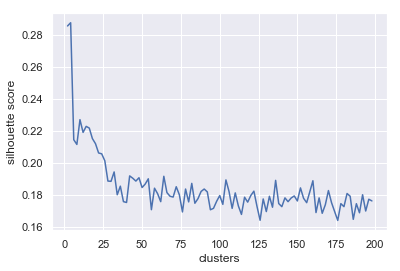

In [131]:
plt.xlabel('clusters')
plt.ylabel('silhouette score')
plt.plot(n_clusters, silhouette_score_);

In [133]:
kmeans.

<bound method BaseEstimator.set_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=198, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>